In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Excel File
file_path = '/content/FDA Data Dashboard v2.xlsx'
df = pd.read_excel(file_path)

# Display the column names and the first few rows to identify the correct column
print("Column Names:", df.columns.tolist())
df.head()


Column Names: ['Recalling Firm Name', 'Product Type', 'Product Classification', 'Reason for Recall', 'Product Description', 'Event Classification', 'Recall Details']


,Recalling Firm Name,Product Type,Product Classification,Reason for Recall,Product Description,Event Classification,Recall Details
0,Samsung Bean Sprout,Food/Cosmetics,Class I,Listeria monocytogenes.,Soy Bean Sprouts in a package labeled in part:...,Class I,https://www.accessdata.fda.gov/scripts/ires/?P...
1,HP Hood (VERNON),Food/Cosmetics,Class II,"Undeclared pineapple, sugar, modified corn sta...",Hood Country Style Cottage Cheese 24oz (UPC 04...,Class II,https://www.accessdata.fda.gov/scripts/ires/?P...
2,THE COCA-COLA COMPANY,Food/Cosmetics,Class II,The potential presence of a foreign metal obje...,Powerade Zero Mixed Berry - 20 oz PET bottles ...,Class II,https://www.accessdata.fda.gov/scripts/ires/?P...
3,THE COCA-COLA COMPANY,Food/Cosmetics,Class II,The potential presence of a foreign metal obje...,Powerade Zero Fruit Punch - 20oz PET bottle...,Class II,https://www.accessdata.fda.gov/scripts/ires/?P...
4,THE COCA-COLA COMPANY,Food/Cosmetics,Class II,The potential presence of a foreign metal obje...,Powerade Mountain Berry Blast - 20oz PET b...,Class II,https://www.accessdata.fda.gov/scripts/ires/?P...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Recalling Firm Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Product Classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Reason for Recall').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Product Description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Product Classification'].value_counts()
    for x_label, grp in _df_4.groupby('Recalling Firm Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Recalling Firm Name')
_ = plt.ylabel('Product Classification')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Reason for Recall'].value_counts()
    for x_label, grp in _df_5.groupby('Product Classification')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Product Classification')
_ = plt.ylabel('Reason for Recall')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Product Description'].value_counts()
    for x_label, grp in _df_6.groupby('Reason for Recall')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Reason for Recall')
_ = plt.ylabel('Product Description')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Event Classification'].value_counts()
    for x_label, grp in _df_7.groupby('Product Description')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Product Description')
_ = plt.ylabel('Event Classification')

Column Names: ['Recalling Firm Name', 'Product Type', 'Product Classification', 'Reason for Recall', 'Product Description', 'Event Classification', 'Recall Details', 'Product_Type', 'Hazard_Type', 'Severity']
Hazard_Type
Biological    12559
Chemical       7498
Other          4473
Physical       1654
Name: count, dtype: int64
Hazard Types and Associated Recall Severity:
 Hazard_Type
Biological    2.702046
Chemical      2.314484
Physical      1.991536
Other         1.958641
Name: Severity, dtype: float64
Hazard Types and Associated Recall Severity:
 Hazard_Type
Biological    2.702046
Chemical      2.314484
Physical      1.991536
Other         1.958641
Name: Severity, dtype: float64


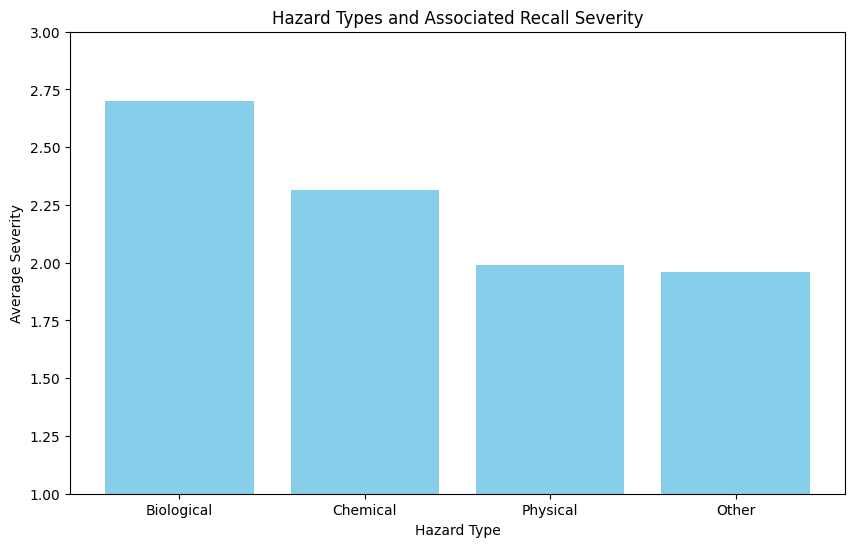

In [14]:
# Display the column names
print("Column Names:", df.columns.tolist())

# Combined and updated lists of keywords for hazard classification
bio_keywords = [
    'Alpha-gal Syndrome', 'Amebiasis', 'Anisakiasis', 'Ascariasis', 'Intestinal roundworm infection',
    'Angiostrongyliasis', 'Rat lungworm', 'Anthrax', 'Antibiotic resistance', 'Botulism', 'Clostridium botulinum',
    'Information for Healthcare Professionals', 'National Botulism Surveillance System', 'Brainerd diarrhea',
    'Brucellosis', 'Brucella infection', 'Campylobacteriosis', 'Campylobacter infection', 'Cholera',
    'Vibrio cholerae infection', 'Ciguatera', 'fish poisoning', 'Cronobacter', 'Clostridium botulinum',
    'Botulism', 'Clostridium perfringens', 'Cryptosporidiosis', 'Cryptosporidium infection', 'Cyclospora',
    'Cyclospora infection', 'Cysticercosis', 'Cystoisosporiasis', 'Isosporiasis', 'Diphyllobothriasis',
    'Diphyllobothrium infection', 'E.coli', 'Diarrheagenic Escherichia coli', 'Enterohemorrhagic Escherichia coli',
    'EHEC', 'Enterotoxigenic Escherichia coli', 'ETEC', 'Escherichia coli O157:H7',
    'Shiga toxin-producing Escherichia coli', 'STEC', 'Foodborne Illness', 'Giardiasis', 'Giardia infection',
    'Haverhill', 'Hepatitis A', 'Intestinal Roundworm infection', 'Ascariasis', 'Isosporiasis', 'Cystoisosporiasis',
    'Leptospirosis', 'Listeriosis (Listeria infection)', 'Marine toxins', 'Ciguatoxin', 'Norovirus',
    'Rat-bite fever', 'Rat lungworm', 'Angiostrongyliasis', 'Raw milk', 'Restaurant resources', 'Rotavirus',
    'Salmonella infection', 'Salmonellosis', 'Salmonella enteritidis', 'Salmonella typhi', 'Typhoid Fever',
    'Scombroid', 'fish poisoning', 'Shigellosis', 'Shigella infection', 'Staphylococcal', 'Staph',
    'Staphylococcus aureus', 'Taeniasis', 'Toxoplasmosis', 'Toxoplasma infection', 'Traveler’s diarrhea',
    'Trichinellosis', 'Trichinosis', 'Trichinella infection', 'Typhoid Fever', 'Viral gastroenteritis',
    'Vibrio Illness', 'Vibriosis', 'Vibrio parahaemolyticus', 'Vibrio vulnificus', 'Vibrio cholerae infection',
    'Cholera', 'Yersinia', 'Yersinia enterocolitica infection',
    'mold (aspergillus brasiliensis)', 'listeria monocytogenes', 'potential cronobacter sakazakii contamination',
    'potential under-processing', 'microbial growth', 'salmonella', 'e. coli', 'non-o157 shiga-toxin producing e. coli',
    'pseudomonas aeruginosa', 'clostridium botulinum', 'potential for microbial contamination',
    'gastrointestinal illness', 'potential liver function issues', 'presumptive positive microbial test',
    'potential foodborne illness', 'potential pathogenic e. coli', 'hepatitis a', 'cyclospora',
    'cronobacter sakazakii', 'botulism', 'contaminated', 'bacterial', 'pathogenic', 'viral', 'infection', 'spoilage',
    'toxins', 'biotoxin', 'pathogens', 'fungi', 'yeast', 'mold growth', 'microorganism', 'bacterium', 'virus',
    'antibiotic residue', 'toxin', 'contamination', 'bacterial growth', 'pathogen', 'microbial', 'biohazard',
    'spoiled', 'infestation', 'parasitic', 'parasite', 'biological contamination', 'food poisoning', 'microbiology',
    'sanitation failure', 'hygiene', 'cross-contamination', 'listeria', 'campylobacter', 'Norovirus',
    'Toxoplasma gondii', 'Staphylococcus aureus'
]


chemical_keywords = [
    'undeclared', 'elevated levels of vitamin d', 'undeclared sulfites', 'fd&c yellow #5', 'undeclared egg yolks',
    'undeclared tuna', 'undeclared soy', 'undeclared wheat', 'undeclared milk', 'undeclared peanuts',
    'undeclared pine nut', 'undeclared egg allergen', 'undeclared gluten', 'undeclared tree nuts',
    'undeclared tree nut (cashew)', 'undeclared almond', 'undeclared pecan', 'undeclared cashews',
    'undeclared almond butter', 'undeclared sesame', 'undeclared fish allergen', 'undeclared milk and egg',
    'undeclared wheat and soy', 'contains undeclared soy & fish', 'due to undeclared fish',
    'may contain undeclared milk', 'undeclared fish', 'due to undeclared hazelnut',
    'does not declare soy lecithin', 'undeclared egg, fish, milk, soy and wheat', 'undeclared hazelnuts',
    'undeclared bonito, sardines, tuna, coconut, shea nut', 'undeclared pine nuts', 'undeclared eggs',
    'undeclared drugs, diclofenac and dexamethasone', 'undeclared sildenafil and tadalafil',
    'undeclared soy, walnuts, and wheat', 'potential allergen – undeclared coconut', 'undeclared allergens',
    'sulfites', 'coconut', 'egg yolks', 'pine nut', 'gluten', 'almond', 'tree nuts', 'pecan', 'cashews',
    'almond butter', 'walnuts', 'egg protein', 'hazelnuts', 'bonito', 'sardines', 'tuna', 'shea nut',
    'sildenafil', 'tadalafil', 'diclofenac', 'dexamethasone', 'hydrogenated castor oil', 'macadamia nuts',
    'cardiac glycosides', 'konjac powder', 'yellow oleander', 'pesticide', 'food additive', 'cleaning agent',
    'lead', 'chemical contamination', 'milk', 'eggs', 'fish', 'shellfish', 'tree nuts', 'peanuts',
    'wheat', 'soybeans', 'sesame', 'tree nut', 'sanitizer','toxin', 'soy'
]

physical_keywords = [
    'possible presence of metal fragments', 'potential presence of glass', 'foreign object', 'plastic piece',
    'potential presence of tiny fragments of metal mesh wire', 'presence of foreign material (metal)',
    'potential for hard plastic opaque pieces', 'presence of bone fragments', 'may contain metal fragments',
    'potential choking hazard', 'may contain small pieces of brown plastic', 'due to exploding bottle risk',
    'potential for soft plastic film', 'potential presence of wood fragments', 'small glass fragments',
    'product may contain hard plastic pieces', 'potential foreign objects - brittle plastic pieces',
    'due to the potential presence of visible, blue plastic pieces', 'potential presence of plastic pieces',
    'potential for residual chlorine from the sanitizing process', 'foreign material', 'hard plastic pieces',
    'bone fragments', 'stainless steel fragments', 'metal mesh wire', 'exploding bottles', 'soft plastic film',
    'glass fragments', 'wood fragments', 'small metal fragments', 'tiny fragments of metal mesh wire',
    'small pieces of brown plastic', 'small glass fragments', 'metal fragment', 'glass shard', 'shard', 'stone',
    'pebble', 'rubber', 'wire', 'screw', 'nut', 'bolt', 'plastic shard', 'wood chip', 'glass piece', 'metallic',
    'ceramic pieces', 'material fragments', 'physical contamination', 'foreign bodies', 'fragements','metal', 'plastic'
    'bones','foreign material'
]

# Function to classify hazards remains the same
def classify_hazard(description):
    if not isinstance(description, str):
        return 'Unknown'
    description = description.lower()

    if any(keyword in description for keyword in bio_keywords):
        return 'Biological'
    if any(keyword in description for keyword in chemical_keywords):
        return 'Chemical'
    if any(keyword in description for keyword in physical_keywords):
        return 'Physical'

    return 'Other'

# Apply the classification and summarize results
df['Hazard_Type'] = df['Reason for Recall'].apply(classify_hazard)
updated_classification_summary = df['Hazard_Type'].value_counts()

print(updated_classification_summary)

# Mapping recall classes to a severity scale
severity_scale = {'Class I': 3, 'Class II': 2, 'Class III': 1}
df['Severity'] = df['Event Classification'].map(severity_scale)

# Grouping by hazard type and calculating average severity
hazard_severity = df.groupby('Hazard_Type')['Severity'].mean().sort_values(ascending=False)

print("Hazard Types and Associated Recall Severity:\n", hazard_severity)

import matplotlib.pyplot as plt

# Assuming you have already set up the DataFrame 'df' and mapped the severity
severity_scale = {'Class I': 3, 'Class II': 2, 'Class III': 1}
df['Severity'] = df['Event Classification'].map(severity_scale)

# Grouping by hazard type and calculating average severity
hazard_severity = df.groupby('Hazard_Type')['Severity'].mean().sort_values(ascending=False)

# Printing out the DataFrame groupings and averages
print("Hazard Types and Associated Recall Severity:\n", hazard_severity)

# Creating a bar chart to visualize the data
plt.figure(figsize=(10, 6))
plt.bar(hazard_severity.index, hazard_severity.values, color='skyblue')

plt.title('Hazard Types and Associated Recall Severity')
plt.xlabel('Hazard Type')
plt.ylabel('Average Severity')
plt.ylim(1, 3)  # Adjust this range if your severity scale is different
plt.show()








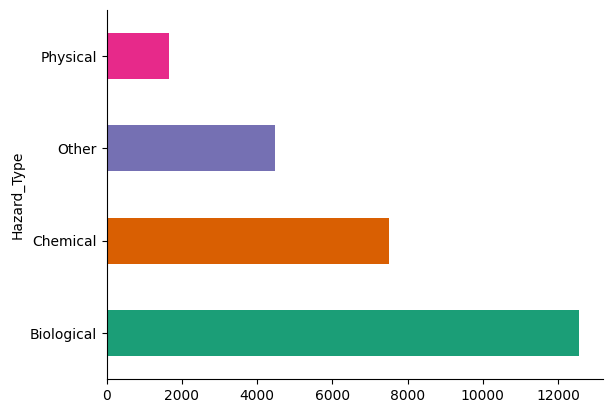

In [9]:
# @title Hazard_Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Hazard_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

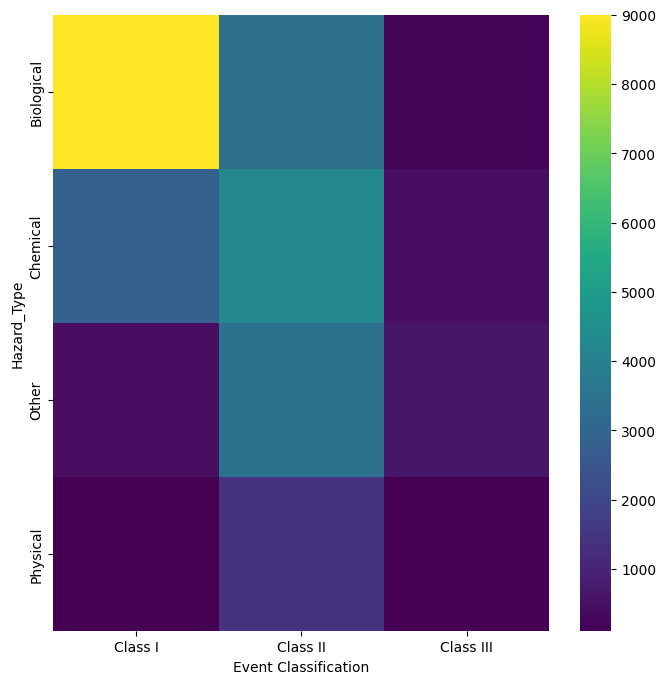

In [11]:
# @title Event Classification vs Hazard_Type

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Hazard_Type'].value_counts()
    for x_label, grp in df.groupby('Event Classification')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Event Classification')
_ = plt.ylabel('Hazard_Type')

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Excel File
file_path = '/content/FDA Data Dashboard v2.xlsx'
df = pd.read_excel(file_path)

# Display the column names
print("Column Names:", df.columns.tolist())

def classify_product_type(description):
    description_lower = description.lower()

    # Categories and corresponding keywords
    categories_keywords = {
    'Dairy and Dairy Alternatives': ['yogurt', 'cheese', 'milk', 'ice cream', 'cream', 'butter', 'soy milk', 'almond milk', 'oat milk', 'vegan cheese', 'coconut milk', 'kefir', 'buttermilk', 'ricotta', 'cottage cheese', 'lactose-free milk', 'Greek yogurt', 'non-dairy creamer', 'whipped cream', 'condensed milk'],
    'Baked Goods and Bakery Products': ['bread', 'cake', 'cookies', 'brownies', 'buns', 'muffin', 'pancake', 'waffle', 'pie', 'donut', 'croissant', 'pastry', 'biscuit', 'bagel', 'breadsticks', 'scone', 'pretzel', 'Danish', 'strudel', 'tart', 'crumpet'],
    'Seafood': ['salmon', 'shrimp', 'fish', 'lobster', 'seafood', 'tuna', 'crab', 'oyster', 'scallop', 'mussels', 'squid', 'octopus', 'anchovy', 'haddock', 'sardine', 'trout', 'tilapia', 'cod', 'catfish', 'swordfish', 'shellfish'],
    'Pet Food': ['dog food', 'cat food', 'pet food', 'dog', 'cat', 'catfish', 'bird food', 'rabbit food', 'hamster food', 'turtle food', 'fish food', 'lizard food', 'reptile food', 'guinea pig food', 'ferret food', 'horse feed', 'pig feed'],
    'Snacks and Confectionery': ['crackers', 'chips', 'popcorn', 'snack', 'nuts', 'trail mix', 'bars', 'gum', 'candy bar', 'jelly', 'gummies', 'licorice', 'chocolate', 'pretzels', 'rice cakes', 'granola', 'marshmallow', 'toffee', 'fudge', 'caramel', 'nougat'],
    'Vegetables and Legumes': ['mushrooms', 'spinach', 'zucchini', 'vegetable', 'salad', 'onions', 'beans', 'sprouts', 'peas', 'lentils', 'chickpeas', 'broccoli', 'carrots', 'celery', 'kale', 'cauliflower', 'bell pepper', 'asparagus', 'cucumber', 'radish'],
    'Fruits and Nuts': ['fruit', 'apricots', 'berry', 'lemon', 'apple', 'banana', 'peach', 'plum', 'raisin', 'almond', 'cashew', 'peanut', 'walnut', 'coconut', 'mango', 'pineapple', 'avocado', 'grapefruit', 'kiwi', 'pomegranate', 'fig', 'date'],
    'Condiments, Sauces, and Spreads': ['sauce', 'dressing', 'hummus', 'chutney', 'dip', 'jam', 'ketchup', 'mustard', 'relish', 'mayonnaise', 'salsa', 'spread', 'marmalade', 'nut butter', 'pesto', 'tahini', 'barbecue sauce', 'hoisin sauce', 'teriyaki sauce', 'soy sauce'],
    'Beverages': ['beverage', 'drink', 'juice', 'soda', 'tea', 'coffee', 'beer', 'wine', 'spirits', 'vodka', 'whiskey', 'rum', 'non-alcoholic', 'energy drink', 'sports drink', 'water', 'sparkling water', 'lemonade', 'cider', 'milkshake', 'smoothie', 'frappuccino', 'hot chocolate', 'kombucha'],
    'Supplements and Health Products': ['tablets','supplement', 'vitamin', 'protein', 'capsules', 'herbal', 'elixir', 'health supplement', 'detox', 'wellness', 'probiotic', 'omega-3', 'multivitamin', 'fiber', 'calcium supplement', 'magnesium supplement', 'iron supplement', 'zinc supplement', 'vitamin C supplement'],
    'Meat and Poultry': ['ham','beef', 'chicken', 'pork', 'lamb', 'turkey', 'meat', 'duck', 'goose', 'rabbit', 'venison', 'quail', 'veal', 'pheasant', 'buffalo', 'ostrich', 'kangaroo', 'elk', 'bison', 'goat', 'guinea fowl'],
    'Grains and Cereals': ['rice', 'oat', 'cereal', 'quinoa', 'barley', 'pasta', 'noodles', 'wheat', 'corn', 'millet', 'bulgur', 'couscous', 'farro', 'sorghum', 'rye', 'spelt', 'teff', 'amaranth', 'buckwheat', 'kamut'],
    'Frozen Foods': ['frozen', 'frozen vegetables', 'frozen fruit', 'frozen meals', 'frozen pizza', 'frozen dessert', 'frozen seafood', 'frozen meat', 'frozen fries', 'frozen waffles', 'frozen dumplings', 'frozen burritos', 'frozen pies', 'frozen appetizers', 'frozen berries', 'frozen spinach', 'frozen broccoli', 'frozen shrimp', 'frozen chicken nuggets'],
    'Canned and Jarred Goods': ['canned', 'jar', 'preserved', 'canned vegetables', 'canned fruit', 'canned soup', 'canned beans', 'canned fish', 'pickles', 'salsa', 'jam', 'jelly', 'marmalade', 'peanut butter', 'olives', 'artichokes', 'tomato paste', 'coconut milk', 'diced tomatoes'],
    'Spices and Herbs': ['spice', 'herb', 'seasoning', 'curry', 'pepper', 'salt', 'coriander', 'cinnamon', 'ginger', 'garlic', 'cumin', 'paprika', 'turmeric', 'basil', 'oregano', 'thyme', 'rosemary', 'dill', 'nutmeg', 'cloves', 'bay leaf'],
    'Dietary Specialties': ['keto', 'gluten-free', 'vegan', 'organic', 'non-GMO', 'all-natural', 'low-sodium', 'sugar-free', 'low-carb', 'dietary supplement', 'paleo', 'diabetic', 'lactose-free', 'halal', 'kosher', 'macrobiotic', 'raw', 'FODMAP-friendly', 'Atkins-friendly', 'Weight Watchers-friendly'],
    'Baby Foods': ['infant formula', 'children', 'child', 'baby', 'formula', 'baby cereal', 'baby snack', 'toddler', 'baby food', 'baby puree', 'baby pouch', 'baby yogurt', 'baby teething biscuit', 'baby rice cakes', 'baby fruit bites', 'baby vegetable sticks', 'baby rice cereal', 'baby oatmeal', 'baby pasta'],
    'Cooking Ingredients': ['olive oil', 'coconut oil', 'vegetable oil', 'butter substitute', 'flour', 'baking mix', 'yeast', 'baking powder', 'baking soda', 'cornstarch', 'vanilla extract', 'almond flour', 'cornmeal', 'cocoa powder', 'powdered sugar', 'brown sugar', 'white sugar', 'confectioners\' sugar'],
    'Ethnic and International Foods': ['asian', 'mexican', 'italian', 'indian', 'thai', 'chinese', 'japanese', 'korean', 'greek', 'mediterranean', 'middle eastern', 'african', 'latin american', 'spanish', 'french', 'german', 'russian', 'brazilian', 'vietnamese', 'irish'],
    'Packaged Meals and Kits': ['kit', 'packaged meal', 'box meal', 'meal prep', 'meal kit', 'frozen meal', 'instant meal', 'convenience meal', 'microwave meal', 'shelf-stable meal', 'TV dinner', 'pre-cooked meal', 'heat-and-eat meal', 'single-serve meal', 'family meal', 'camping meal', 'emergency meal', 'survival meal'],
    'Sweeteners and Baking Ingredients': ['sugar', 'honey', 'agave', 'sweetener', 'stevia', 'maple syrup', 'molasses', 'brown sugar', 'powdered sugar', 'corn syrup', 'date syrup', 'artificial sweetener', 'coconut sugar', 'cane sugar', 'monk fruit sweetener', 'xylitol', 'erythritol', 'sorghum syrup', 'malt syrup'],
    'Teas and Coffees': ['tea', 'coffee', 'herbal tea', 'green tea', 'black tea', 'coffee bean', 'chai', 'matcha', 'espresso', 'decaf', 'arabica', 'robusta', 'oolong', 'white tea', 'pu-erh', 'yerba mate', 'hibiscus tea', 'chamomile tea', 'rooibos tea', 'earl grey', 'peppermint tea', 'lavender tea'],
    'Alternative Proteins': ['tofu', 'seitan', 'tempeh', 'plant-based protein', 'vegan protein', 'lentils', 'chickpeas', 'black beans', 'quinoa', 'edamame', 'hemp seeds', 'spirulina', 'chia seeds', 'nutritional yeast', 'pea protein', 'soy protein', 'pumpkin seeds', 'sunflower seeds', 'flaxseeds'],
    'Herbal and Dietary Supplements': ['herbal supplement', 'health supplement', 'detox', 'wellness product', 'vitamin D', 'calcium', 'iron', 'magnesium', 'zinc', 'echinacea', 'ginseng', 'melatonin', 'fish oil', 'glucosamine', 'turmeric', 'collagen', 'probiotics', 'fiber supplement', 'creatine', 'ashwagandha', 'valerian root'],
    'Ready-to-Eat Meals': ['ready meal', 'prepared meal', 'instant meal', 'meal kit', 'convenience meal', 'frozen meal', 'microwavable meal', 'shelf-stable meal', 'heat-and-eat meal', 'single-serve meal', 'family meal', 'camping meal', 'emergency meal', 'survival meal', 'TV dinner', 'pre-cooked meal'],
    'Infused and Flavored Waters': ['flavored water', 'infused water', 'vitamin water', 'sparkling water', 'coconut water', 'cucumber water', 'lemon water', 'berry-infused water', 'lime-infused water', 'mint-infused water', 'peach-infused water', 'orange-infused water', 'watermelon water', 'rose water', 'lavender-infused water', 'electrolyte water', 'alkaline water', 'ginger-infused water', 'hibiscus-infused water', 'chamomile-infused water']
}


    for category, keywords in categories_keywords.items():
        if any(keyword in description_lower for keyword in keywords):
            return category

    return 'Other'

# Classification and summarize results
df['Product_Type'] = df['Product Description'].apply(classify_product_type)
product_type_summary = df['Product_Type'].value_counts()

print("Classification Summary:")
print(product_type_summary)

# Map recall classifications to a severity scale (higher numbers indicate more severe recalls)
recall_severity_mapping = {
    'Class I': 3,   # Most severe
    'Class II': 2,
    'Class III': 1  # Least severe
}

# Apply the mapping to your DataFrame
df['Recall Severity'] = df['Event Classification'].map(recall_severity_mapping)

# Group by Product_Type and calculate the average recall severity for each category
avg_recall_severity_by_category = df.groupby('Product_Type')['Recall Severity'].mean().sort_values(ascending=False)

# Display the results
print("Average Recall Severity by Product Category:\n", avg_recall_severity_by_category)

Column Names: ['Recalling Firm Name', 'Product Type', 'Product Classification', 'Reason for Recall', 'Product Description', 'Event Classification', 'Recall Details']
Classification Summary:
Product_Type
Dairy and Dairy Alternatives         5790
Baked Goods and Bakery Products      3014
Other                                2975
Vegetables and Legumes               2519
Seafood                              2456
Snacks and Confectionery             1868
Fruits and Nuts                      1829
Supplements and Health Products      1066
Spices and Herbs                     1045
Condiments, Sauces, and Spreads       846
Beverages                             557
Meat and Poultry                      537
Grains and Cereals                    430
Dietary Specialties                   204
Ethnic and International Foods        186
Canned and Jarred Goods               178
Frozen Foods                          177
Pet Food                              109
Sweeteners and Baking Ingredients     101

In [4]:
# Load the Excel File
file_path = '/content/FDA Data Dashboard v2.xlsx'
df = pd.read_excel(file_path)

df['Product_Type'] = df['Product Description'].apply(classify_product_type)

# Filter and display products classified as 'Other'
other_products = df[df['Product_Type'] == 'Other']

print("Products classified as 'Other':")
print(other_products['Product Description'])

Products classified as 'Other':
16       Wesco mint no-bake cookie bites 9oz cup UPC 75...
29       Bob Evan's Original Mash Potato 2lbs (32 oz) p...
66       Banh Pia Classic Hopia, Mung Bean Durian, 16.8...
82       NAT & ART HAZELNUT TYPE FLAVOR #521510, in 6 g...
115      MUTTI Crushed Tomatoes; Polpa; Net Wt 27.9 OZ ...
                               ...                        
26036    Santos Brand, Deggi Mirch (Red Capsicum & Kash...
26039    Santos Brand, Cardamom packed in clear plastic...
26040    Santos Brand, Whole Mace packed in clear plast...
26043    Santos Brand, Suji (Farina) packed in clear pl...
26122    "***Queso Blanco del Pais***TRIDAS***Receta Or...
Name: Product Description, Length: 2975, dtype: object


In [5]:
# Apply the classifications
df['Hazard_Type'] = df['Reason for Recall'].apply(classify_hazard)
df['Product_Type'] = df['Product Description'].apply(classify_product_type)

# Summarize the frequencies of Hazard Types and Product Types
hazard_summary = df['Hazard_Type'].value_counts()
product_type_summary = df['Product_Type'].value_counts()

# Identify the most common Hazard Type and Product Type
most_common_hazard = hazard_summary.idxmax()
most_common_product = product_type_summary.idxmax()

# Display the summaries and emphasize the most common types
print("Hazard Type Summary:")
print(hazard_summary)
print(f"\nThe most common Hazard Type is: {most_common_hazard} with {hazard_summary.max()} occurrences.")

print("\nProduct Type Summary:")
print(product_type_summary)
print(f"\nThe most common Product Type is: {most_common_product} with {product_type_summary.max()} occurrences.")

# Optional: For further emphasis, display a few examples of products and recalls associated with the most common hazard and product types
most_common_hazard_products = df[df['Hazard_Type'] == most_common_hazard]['Product Description'].head()
most_common_product_recalls = df[df['Product_Type'] == most_common_product]['Reason for Recall'].head()

print(f"\nExamples of products associated with the most common hazard ({most_common_hazard}):")
print(most_common_hazard_products)

print(f"\nExamples of recalls associated with the most common product ({most_common_product}):")
print(most_common_product_recalls)

# Generate a cross-tabulation of Product Types vs Hazard Types
crosstab_result = pd.crosstab(df['Product_Type'], df['Hazard_Type'])

# Display the cross-tabulation
print("\nCross-tabulation of Product Types vs Hazard Types:")
print(crosstab_result)



Hazard Type Summary:
Hazard_Type
Biological    12559
Chemical       7498
Other          4473
Physical       1654
Name: count, dtype: int64

The most common Hazard Type is: Biological with 12559 occurrences.

Product Type Summary:
Product_Type
Dairy and Dairy Alternatives         5790
Baked Goods and Bakery Products      3014
Other                                2975
Vegetables and Legumes               2519
Seafood                              2456
Snacks and Confectionery             1868
Fruits and Nuts                      1829
Supplements and Health Products      1066
Spices and Herbs                     1045
Condiments, Sauces, and Spreads       846
Beverages                             557
Meat and Poultry                      537
Grains and Cereals                    430
Dietary Specialties                   204
Ethnic and International Foods        186
Canned and Jarred Goods               178
Frozen Foods                          177
Pet Food                              109
S

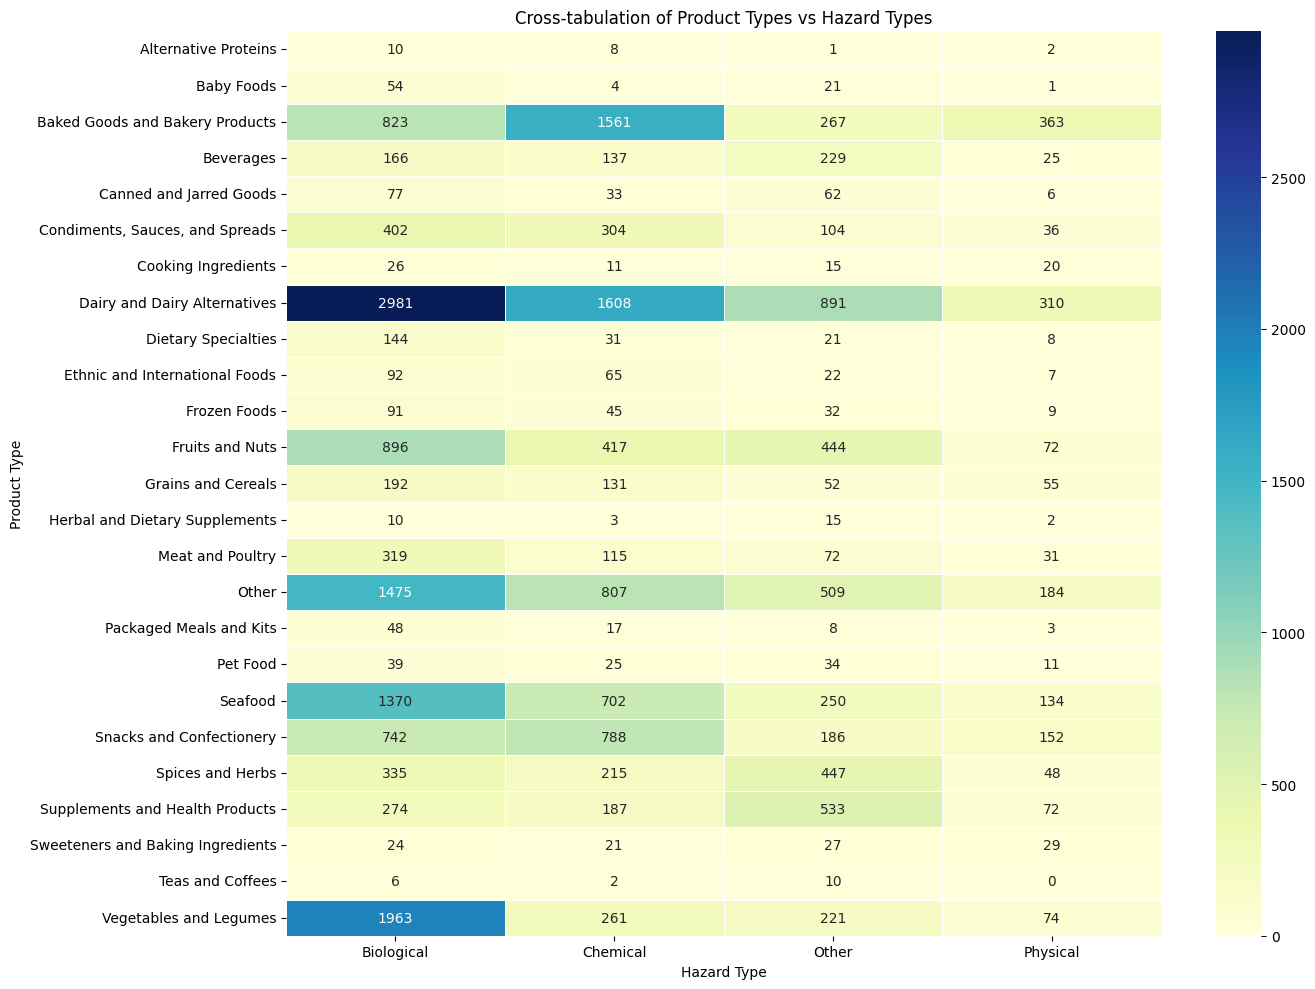

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the cross-tabulation
data = {
    "Biological": [10, 54, 823, 166, 77, 402, 26, 2981, 144, 92, 91, 896, 192, 10, 319, 1475, 48, 39, 1370, 742, 335, 274, 24, 6, 1963],
    "Chemical": [8, 4, 1561, 137, 33, 304, 11, 1608, 31, 65, 45, 417, 131, 3, 115, 807, 17, 25, 702, 788, 215, 187, 21, 2, 261],
    "Other": [1, 21, 267, 229, 62, 104, 15, 891, 21, 22, 32, 444, 52, 15, 72, 509, 8, 34, 250, 186, 447, 533, 27, 10, 221],
    "Physical": [2, 1, 363, 25, 6, 36, 20, 310, 8, 7, 9, 72, 55, 2, 31, 184, 3, 11, 134, 152, 48, 72, 29, 0, 74]
}

product_types = [
    "Alternative Proteins", "Baby Foods", "Baked Goods and Bakery Products", "Beverages",
    "Canned and Jarred Goods", "Condiments, Sauces, and Spreads", "Cooking Ingredients",
    "Dairy and Dairy Alternatives", "Dietary Specialties", "Ethnic and International Foods",
    "Frozen Foods", "Fruits and Nuts", "Grains and Cereals", "Herbal and Dietary Supplements",
    "Meat and Poultry", "Other", "Packaged Meals and Kits", "Pet Food", "Seafood",
    "Snacks and Confectionery", "Spices and Herbs", "Supplements and Health Products",
    "Sweeteners and Baking Ingredients", "Teas and Coffees", "Vegetables and Legumes"
]

# Create DataFrame
df = pd.DataFrame(data, index=product_types)

# Plotting
plt.figure(figsize=(14, 10))
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Cross-tabulation of Product Types vs Hazard Types')
plt.ylabel('Product Type')
plt.xlabel('Hazard Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-labels
plt.show()

In [6]:
import pandas as pd
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(df['Event Classification'], df['Reason for Recall'])

# Performing Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}, P-value: {p}")


Chi-square Statistic: 50748.59006340234, P-value: 0.0


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Preprocess the Data
# Vectorize product descriptions
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['Reason for Recall']).toarray()

# Encode the Hazard_Type labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Event Classification'])

#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate the Model
# Predictions
rf_predictions = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy}")

# Detailed classification report

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=label_encoder.classes_))

Random Forest Accuracy: 0.9209471071223984
Random Forest Classification Report:
              precision    recall  f1-score   support

     Class I       0.93      0.95      0.94      2414
    Class II       0.91      0.93      0.92      2515
   Class III       0.94      0.65      0.77       308

    accuracy                           0.92      5237
   macro avg       0.93      0.84      0.88      5237
weighted avg       0.92      0.92      0.92      5237



In [8]:
#Preprocess the Data
# Vectorize product descriptions
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['Product Description']).toarray()

# Encode the Hazard_Type labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Event Classification'])

#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate the Model
# Predictions
rf_predictions = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy}")

# Detailed classification report

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=label_encoder.classes_))


Random Forest Accuracy: 0.8590796257399275
Random Forest Classification Report:
              precision    recall  f1-score   support

     Class I       0.87      0.88      0.87      2414
    Class II       0.85      0.89      0.87      2515
   Class III       0.99      0.47      0.64       308

    accuracy                           0.86      5237
   macro avg       0.90      0.75      0.79      5237
weighted avg       0.86      0.86      0.86      5237



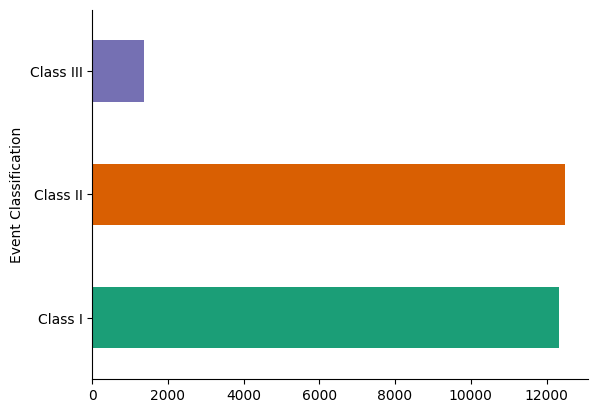

In [10]:
# @title Event Classification

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Event Classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)